## Class Activity / Practice
Loan Default Prediction Using Classification
predict whether a 
borrower will default on a loa using  Python and libraries like Pandas, Matplotlib, and
NumPy to perform data analysis, preprocessing, visualization, and build a basic classificati n
model.

# Scenario
You work as a data analyst at a financial institution. Your team is responsible for predicting
whether loan applicants are likely to default on their loans. By building a classification model,
the institution can minimize financial risks and provide better loan offers to borrower

# Activity tasks

1. Explore and load the dataset
2. visualize the dataset
3. Preprocess the data
4. Build a classification model
5. insights and recommentationss.

In [3]:
# generating a dataset (provided)
import pandas as pd
import numpy as np
# Set random seed
np.random.seed(42)
# Generate synthetic data
n_samples = 500
credit_score = np.random.randint(300, 850, n_samples)
annual_income = np.random.randint(20000, 120000, n_samples)
loan_amount = np.random.randint(1000, 50000, n_samples)
loan_term = np.random.choice([12, 24, 36, 48, 60], n_samples)
debt_to_income_ratio = np.round(np.random.uniform(0.1, 0.5, n_samples), 2)
age = np.random.randint(18, 70, n_samples)
# Simulate default based on conditions
defaulted = (credit_score < 600) | (debt_to_income_ratio > 0.4) | (annual_income < 30000)
defaulted = defaulted.astype(int)
# Create a DataFrame
data = pd.DataFrame({
 'Credit_Score': credit_score,
 'Annual_Income': annual_income,
 'Loan_Amount': loan_amount,
 'Loan_Term': loan_term,
 'Debt_to_Income_Ratio': debt_to_income_ratio,
 'Age': age,
 'Defaulted': defaulted
})
# Save to CSV
data.to_csv('loan_data.csv', index=False)
print("Synthetic dataset saved as 'loan_data.csv'.")

Synthetic dataset saved as 'loan_data.csv'.


# task 1: load and explore

In [4]:
# Load the data set using pandas
df= pd.read_csv('loan_data.csv')

# Show the first five rows
print(df.head(5))

# Check for missing or rnull values
print(df.isnull().any())

# summarize the dataset
print(df.describe())

   Credit_Score  Annual_Income  Loan_Amount  Loan_Term  Debt_to_Income_Ratio  \
0           402          37640        10524         36                  0.46   
1           735          72528        32880         60                  0.41   
2           570          58413        40224         24                  0.32   
3           406          72638        37980         48                  0.20   
4           371          72736        33409         24                  0.22   

   Age  Defaulted  
0   56          1  
1   39          1  
2   29          1  
3   41          1  
4   64          1  
Credit_Score            False
Annual_Income           False
Loan_Amount             False
Loan_Term               False
Debt_to_Income_Ratio    False
Age                     False
Defaulted               False
dtype: bool
       Credit_Score  Annual_Income   Loan_Amount   Loan_Term  \
count    500.000000     500.000000    500.000000  500.000000   
mean     567.410000   66070.038000  25780.972000 

# task 2 visualize the data

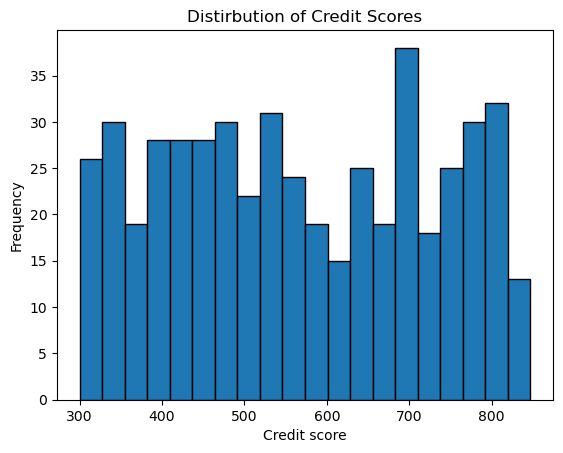

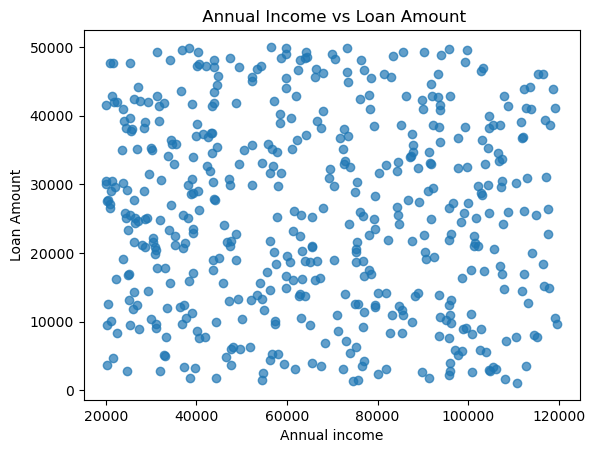

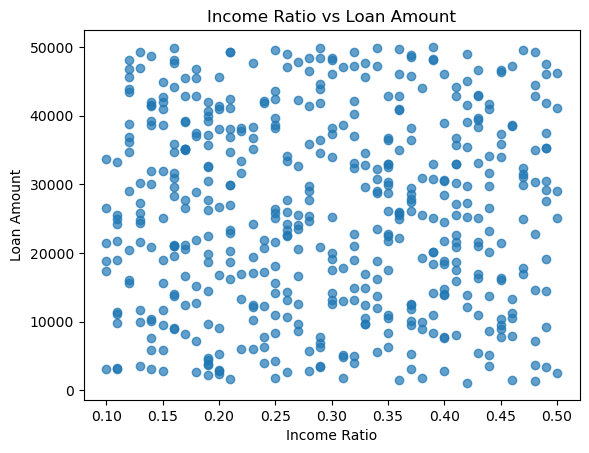

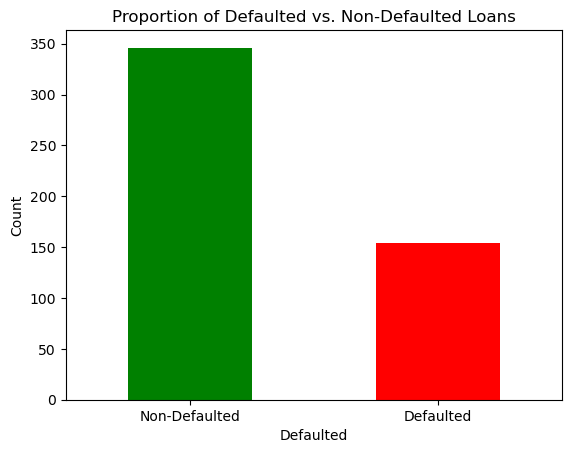

In [5]:
import matplotlib.pyplot as plt

# histogram for credit score
plt.hist( df['Credit_Score'], bins=20, edgecolor='k')
plt.title("Distirbution of Credit Scores")
plt.xlabel("Credit score")
plt.ylabel("Frequency")
plt.show()

# scatter for annual income vs loan amount
plt.scatter(df['Annual_Income'],df['Loan_Amount'],alpha=0.7)
plt.title(" Annual Income vs Loan Amount")
plt.xlabel("Annual income")
plt.ylabel("Loan Amount")
plt.show()

# scatter for debt to income ratio vs loan amound
plt.scatter(df['Debt_to_Income_Ratio'],df['Loan_Amount'],alpha=0.7)
plt.title("Income Ratio vs Loan Amount")
plt.xlabel("Income Ratio")
plt.ylabel("Loan Amount")
plt.show()

#proporiton of defaulted vs non defaulted loans as a bar chart
df['Defaulted'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Proportion of Defaulted vs. Non-Defaulted Loans')
plt.xticks([0, 1], ['Non-Defaulted', 'Defaulted'], rotation=0)
plt.ylabel('Count')
plt.show()


# Task 3 Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features using min max scaling
scaler = MinMaxScaler()
df[['Credit_Score', 'Annual_Income', 'Loan_Amount']] = scaler.fit_transform(df[['Credit_Score', 'Annual_Income', 'Loan_Amount']])

#split data into features x target y
X = df.drop('Defaulted', axis=1)
y = df['Defaulted']

#perform an 80/20 trrain test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (400, 6)
Test set size: (100, 6)


# Task 4 Build a classification model
1. use a logistic regression model to predict defaults
2. train the model on the training set and evualuate it on the test set
3. display the confusion matrix, accuracy, precision, recall

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)


# evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[25  6]
 [ 4 65]]
Accuracy: 0.90
Precision: 0.92
Recall: 0.94


# Task 5: Insights and recommendation
1. interpret the confusion matrix and metrics
2. idnetify most influential features using the coefficients of the logistic regression
3. suggest improvements or add steps to impove the model

# interpreting the confusion matrix and metrics

True negative = 25, the model correctly identified 25 non defaulted loans
false positive = 6, the model incorrectly predicted 6 non defaulted loans as defaulted
false negative = 4, the model incorrectly pedicted 4 deefaulted loans as non defaulted
true positive = 65, the model corretly identified 65 defaulted loans


Accuracy 90% - measures the overall corrrectness of the models predictions, this is a strong performance. Though it may be less meaningful for imbalanced data sets

Precision 92% - indicates the eproportion of correctly pedicted deefaulted loans out of all loans pedicted as defaulted. A high
precision shows that the modeel is good at avoiding false positives

Recall 94% - indicates proportion of correctly predicted defaulted loans out of all actual defaulted loans. A high recall shows
that the model is effective at idnetifying defaulted loans, minimizing false negatives



In [8]:
# identifying most influential features
feature_importance = pd.DataFrame({
 'Feature': X_train.columns,
 'Coefficient': model.coef_[0]
})
feature_importance.sort_values(by='Coefficient', key=abs,
ascending=False, inplace=True)
print(feature_importance)


                Feature  Coefficient
0          Credit_Score    -5.765680
4  Debt_to_Income_Ratio     2.959582
1         Annual_Income    -1.620103
2           Loan_Amount     0.170106
5                   Age    -0.002670
3             Loan_Term    -0.001497


The coefficieents represent how much each feature contributes to thepredictions. Features with larger  absolute coefficients are more influential


Positive coefficients increase the liklihood of defaulting
negative coefficients decrease the likelihood of defaulting

The features Debt-to-Income Ratio and Credit 
Score are likely to have the most significant impact on loan default prediction based on their rhigher coefficient values compared to the other featuress.

# Suggestions for improvements

Perhaps feature engineereirng can be useful- such as ceating new features like income to loan ration (annual income/loan amount) or age group bucketing
We could also transform skewed features like annual income with log transformations to reduce outliers